In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import SnowballStemmer

# Configurar matplotlib para que las gráficas se muestren en el notebook
%matplotlib inline

df = pd.read_csv("/content/drive/MyDrive/RestMex/Rest-Mex_2025_train.csv")
df.head()

# Descargar recursos de NLTK (solo la primera vez)
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('punkt_tab') # Download the missing punkt_tab resource

# Configurar stopwords y el stemmer para español
spanish_stopwords = set(stopwords.words('spanish'))
stemmer = SnowballStemmer("spanish")


# Función para limpiar el texto: convertir a minúsculas, eliminar puntuación y caracteres especiales
def clean_text(text):
    text = text.lower()  # Convertir a minúsculas
    # Eliminar cualquier caracter que no sea letra (incluyendo tildes), número o espacio
    text = re.sub(r'[^a-záéíóúüñ0-9\s]', '', text)
    text = re.sub(r'\s+', ' ', text).strip()  # Eliminar espacios extra
    return text

# Función para tokenizar el texto
def tokenize_text(text):
    tokens = word_tokenize(text, language='spanish')
    return tokens

# Función para eliminar stopwords y aplicar stemming
def remove_stopwords_and_stem(tokens):
    filtered_tokens = [stemmer.stem(token) for token in tokens if token not in spanish_stopwords]
    return filtered_tokens

# Función que integra todo el proceso de preprocesamiento para un texto dado
def preprocess_text(text):
    cleaned = clean_text(text)
    tokens = tokenize_text(cleaned)
    processed_tokens = remove_stopwords_and_stem(tokens)
    return processed_tokens

# Aplicar el preprocesamiento a las columnas 'Review' y 'Title'
df['Review_clean'] = df['Review'].astype(str).apply(clean_text)
df['Review_tokens'] = df['Review_clean'].apply(tokenize_text)
df['Review_processed'] = df['Review_tokens'].apply(remove_stopwords_and_stem)

df['Title_clean'] = df['Title'].astype(str).apply(clean_text)
df['Title_tokens'] = df['Title_clean'].apply(tokenize_text)
df['Title_processed'] = df['Title_tokens'].apply(remove_stopwords_and_stem)

# Muestra algunas filas del dataset con las versiones limpias y procesadas del texto.
sample_columns = ['Title', 'Title_clean', 'Title_tokens', 'Title_processed',
                  'Review', 'Review_clean', 'Review_tokens', 'Review_processed']
display(df[sample_columns].head(10))

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


,Title,Title_clean,Title_tokens,Title_processed,Review,Review_clean,Review_tokens,Review_processed
0,Mi Lugar Favorito!!!!,mi lugar favorito,"[mi, lugar, favorito]","[lug, favorit]",Excelente lugar para comer y pasar una buena n...,excelente lugar para comer y pasar una buena n...,"[excelente, lugar, para, comer, y, pasar, una,...","[excelent, lug, com, pas, buen, noch, servici,..."
1,lugares interesantes para visitar,lugares interesantes para visitar,"[lugares, interesantes, para, visitar]","[lugar, interes, visit]","andar mucho, así que un poco difícil para pers...",andar mucho así que un poco difícil para perso...,"[andar, mucho, así, que, un, poco, difícil, pa...","[andar, asi, dificil, person, niñ, pequeñ, muc..."
2,No es el mismo Dreams,no es el mismo dreams,"[no, es, el, mismo, dreams]","[mism, dreams]","Es nuestra cuarta visita a Dreams Tulum, elegi...",es nuestra cuarta visita a dreams tulum elegim...,"[es, nuestra, cuarta, visita, a, dreams, tulum...","[cuart, visit, dreams, tulum, eleg, hotel, fes..."
3,un buen panorama cerca de CancÃºn,un buen panorama cerca de cancn,"[un, buen, panorama, cerca, de, cancn]","[buen, panoram, cerc, cancn]","Estando en CancÃºn, fuimos al puerto y tomamos...",estando en cancn fuimos al puerto y tomamos un...,"[estando, en, cancn, fuimos, al, puerto, y, to...","[cancn, puert, tom, ferry, isla, mujeresdespus..."
4,El mejor,el mejor,"[el, mejor]",[mejor],Es un lugar antiguo y por eso me encanto tiene...,es un lugar antiguo y por eso me encanto tiene...,"[es, un, lugar, antiguo, y, por, eso, me, enca...","[lug, antigu, encant, are, jueg, gigant, bolic..."
5,Preciosa,preciosa,[preciosa],[precios],La mejor playa en la que he estado. Arena blan...,la mejor playa en la que he estado arena blanc...,"[la, mejor, playa, en, la, que, he, estado, ar...","[mejor, play, aren, blanc, finisim, agu, trans..."
6,Maravillosa Playa.,maravillosa playa,"[maravillosa, playa]","[maravill, play]",Visitar la zona arqueologica de Tulum y disfru...,visitar la zona arqueologica de tulum y disfru...,"[visitar, la, zona, arqueologica, de, tulum, y...","[visit, zon, arqueolog, tulum, disfrut, play, ..."
7,Un muy buen lugar para quedarse y comer en Pal...,un muy buen lugar para quedarse y comer en pal...,"[un, muy, buen, lugar, para, quedarse, y, come...","[buen, lug, qued, com, palenqu]",Conozco Mayabel desde hace más de 15 años. Es ...,conozco mayabel desde hace más de 15 años es u...,"[conozco, mayabel, desde, hace, más, de, 15, a...","[conozc, mayabel, hac, 15, años, lugar, unic, ..."
8,Tiempo para mi...,tiempo para mi,"[tiempo, para, mi]",[tiemp],"las instalaciones están hermosas, es de esos l...",las instalaciones están hermosas es de esos lu...,"[las, instalaciones, están, hermosas, es, de, ...","[instal, herm, lugar, pued, disfrut, tiemp, ki..."
9,Buena Ubicación y limpio,buena ubicación y limpio,"[buena, ubicación, y, limpio]","[buen, ubic, limpi]",estuvimoa hospedados para participar en el eve...,estuvimoa hospedados para participar en el eve...,"[estuvimoa, hospedados, para, participar, en, ...","[estuvimo, hosped, particip, event, triatlon, ..."


In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter
import psutil

# Función para imprimir el uso de memoria
def print_memory_usage():
    mem = psutil.virtual_memory()
    print(f"Total: {mem.total / (1024 ** 2):.2f} MB, Disponible: {mem.available / (1024 ** 2):.2f} MB, Uso: {mem.percent}%")

# Antes de ejecutar el código problemático
print("Antes de generar la nube de palabras:")
print_memory_usage()

# Aquí va el código que genera la nube de palabras
all_review_text = " ".join(df["Review_clean"].tolist())
wordcloud_review = WordCloud(width=800, height=400, background_color='white').generate(all_review_text)

print("\nDespués de generar la nube de palabras:")
print_memory_usage()

Antes de generar la nube de palabras:
Total: 12978.96 MB, Disponible: 9442.20 MB, Uso: 27.3%

Después de generar la nube de palabras:
Total: 12978.96 MB, Disponible: 9198.83 MB, Uso: 29.1%


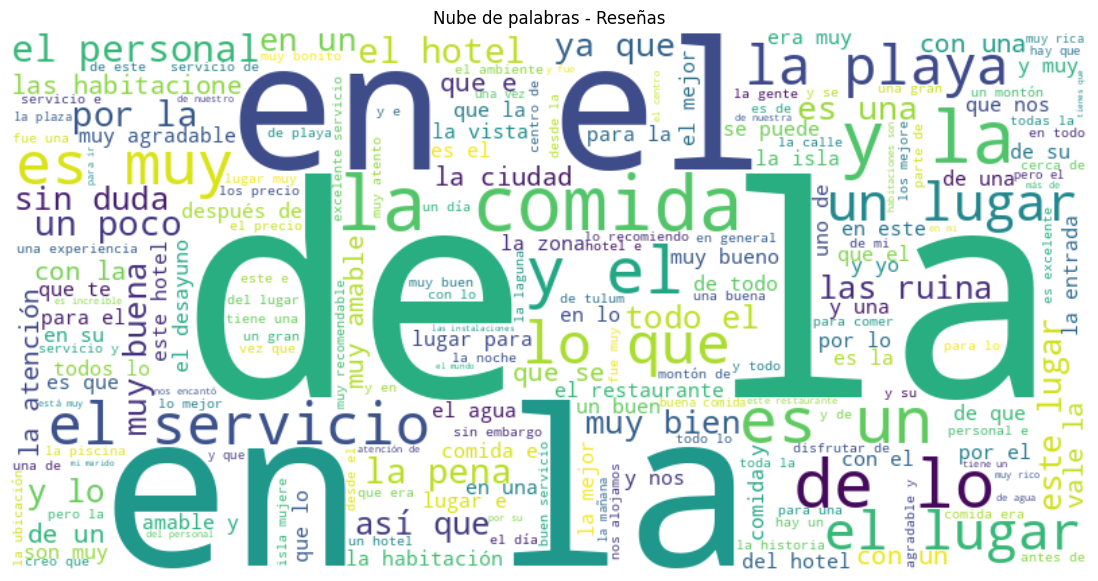

In [ ]:
# Generar nube de palabras para las Reseñas
all_review_text = " ".join(df["Review_clean"].tolist())
wordcloud_review = WordCloud(width=800, height=400, background_color='white').generate(all_review_text)

plt.figure(figsize=(15, 7))
plt.imshow(wordcloud_review, interpolation='bilinear')
plt.axis('off')
plt.title("Nube de palabras - Reseñas")
plt.show()

In [ ]:
spanish_stopwords = set(stopwords.words('spanish'))

for w in ["del", "la", "en", "de", "lo"]:
    print(w, w in spanish_stopwords)

del True
la True
en True
de True
lo True


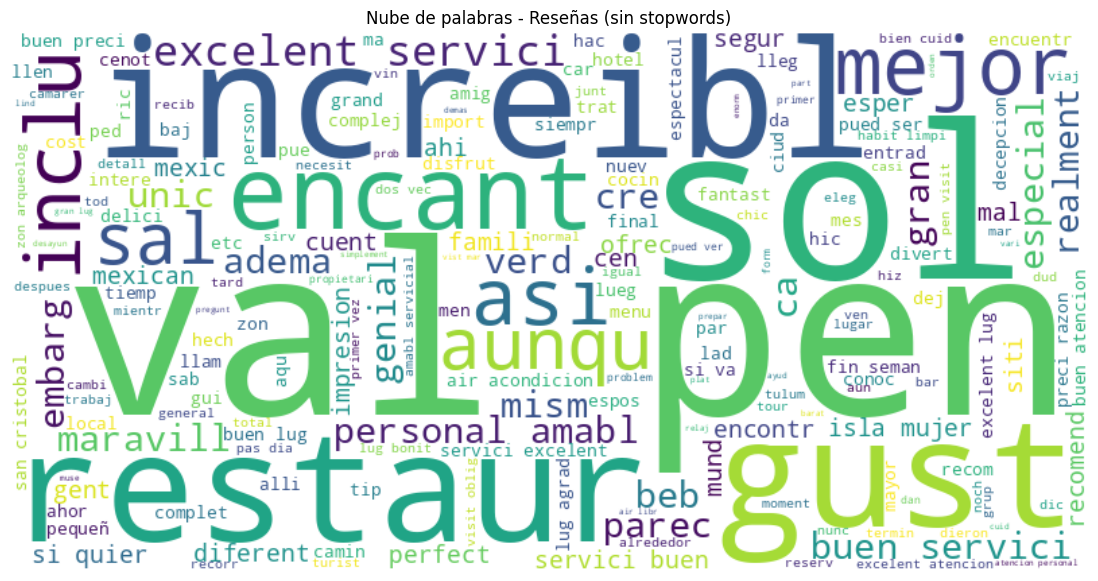

In [ ]:
all_review_text_processed = [
    " ".join(tokens) for tokens in df["Review_processed"]
]
wordcloud_review = WordCloud(width=800, height=400, background_color='white').generate(" ".join(all_review_text_processed))

plt.figure(figsize=(15, 7))
plt.imshow(wordcloud_review, interpolation='bilinear')
plt.axis('off')
plt.title("Nube de palabras - Reseñas (sin stopwords)")
plt.show()

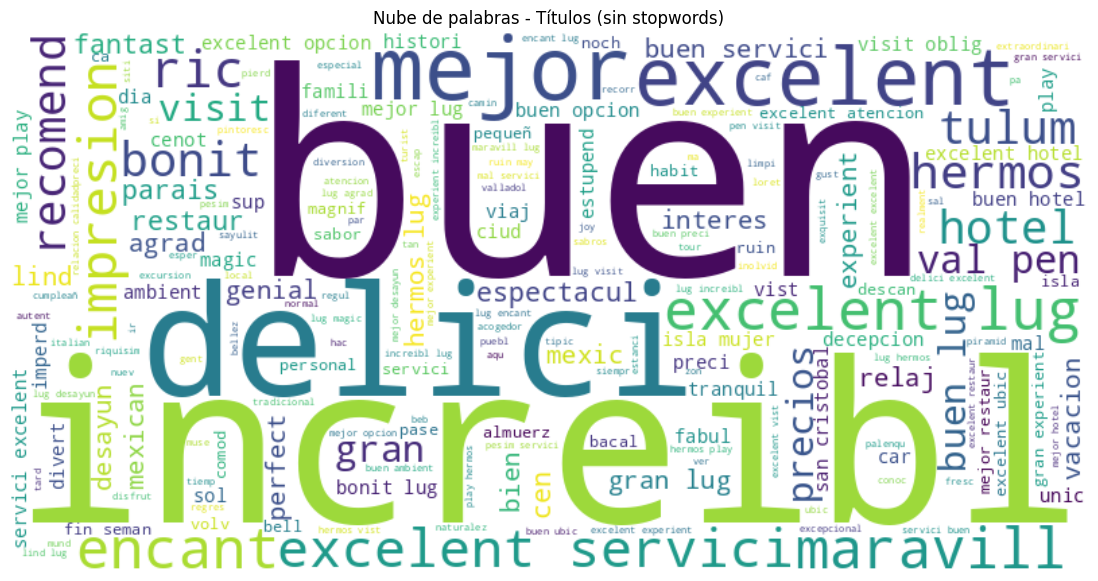

In [ ]:

# Unir todos los tokens procesados en una sola cadena
all_title_text_processed = [
    " ".join(tokens) for tokens in df["Title_processed"]
]

# Generar la nube de palabras usando los títulos procesados
wordcloud_title = WordCloud(
    width=800,
    height=400,
    background_color='white'
).generate(" ".join(all_title_text_processed))

# Visualizar la nube de palabras
plt.figure(figsize=(15, 7))
plt.imshow(wordcloud_title, interpolation='bilinear')
plt.axis('off')
plt.title("Nube de palabras - Títulos (sin stopwords)")
plt.show()